# Analysis of the dataset after the dataprocessing step

What is the model actually getting?

In [31]:
from Bio.PDB import *
import nglview as nv
import ipywidgets

In [1]:
import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
ds = datasets.load_from_disk('../data/dataset')['train'].select(range(10000))

In [3]:
ds.set_format('numpy')

In [4]:
ds

Dataset({
    features: ['meso_seq', 'thermo_seq', 'taxid', 'query_align_cov', 'subject_align_cov', 'bit_score', 'scaled_local_symmetric_percent_id', 'meso_seq_len', 'thermo_seq_len', 'seq_len_diff', 'meso_temp', 'thermo_temp', 'index', 'cluster', 'status_in_cluster'],
    num_rows: 10000
})

## Plots of length differences

Text(0.5, 1.0, 'Absolute difference in length')

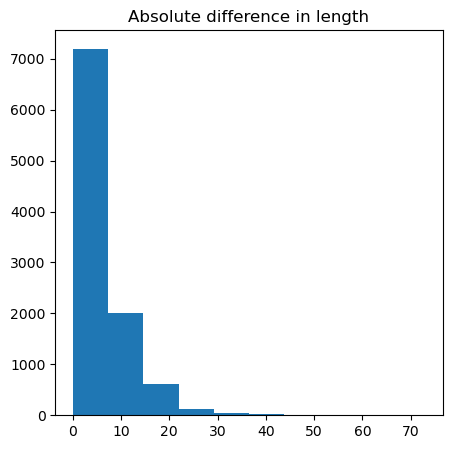

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(ds['seq_len_diff'])
ax.set_title('Absolute difference in length')

Text(0.5, 1.0, 'Normalized absolute difference in length')

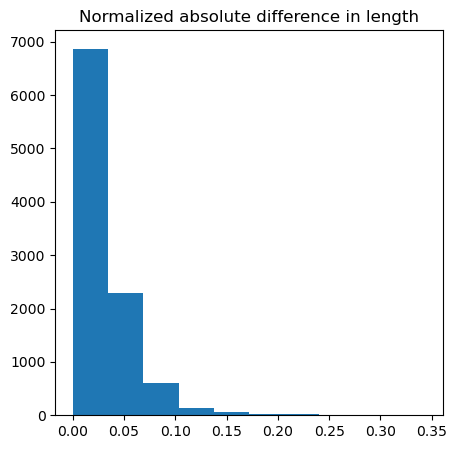

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
norm_len_diff = 2*np.array(ds['seq_len_diff'])/(ds['meso_seq_len']+ds['thermo_seq_len'])
ax.hist(norm_len_diff)
ax.set_title('Normalized absolute difference in length')

Text(0.5, 1.0, 'Normalized difference in length of thermo')

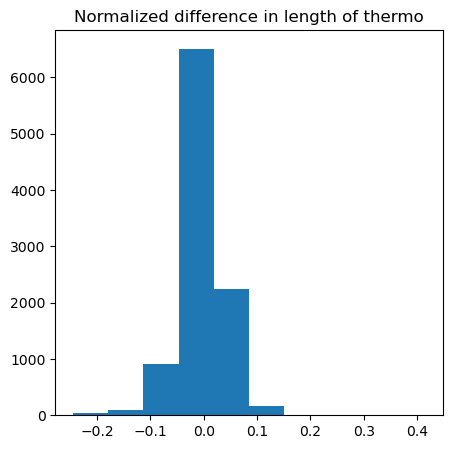

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
thermo_diff = (ds['thermo_seq_len'] - ds['meso_seq_len'])/ds['meso_seq_len']
ax.hist(thermo_diff)
ax.set_title('Normalized difference in length of thermo')

In [19]:
thermo_diff.mean()

-0.0023580521197379945

Thermo is lightly shorter on average

Text(0, 0.5, 'norm length difference')

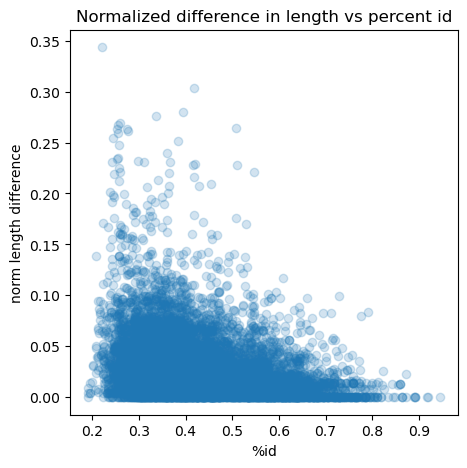

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(ds['scaled_local_symmetric_percent_id'], norm_len_diff, alpha=0.2)
ax.set_title('Normalized difference in length vs percent id')
ax.set_xlabel('%id')
ax.set_ylabel('norm length difference')

## Let's check if energy difference is actually negative for the thermophilic protein

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
sns.set_style('ticks')
sns.set_context('talk')

#### This is how we would normallly load it, if the job had finished, but gpus are taken so use existing replicates (see below)

In [2]:
with open('../data/thermo_gen_estimated.json', 'r') as f:
    data = json.load(f)

In [3]:
data

{'meso_0': [-2.443953894506648, 0.017615079338946654],
 'meso_1': [-2.702195995316279, 0.022529967897150973],
 'meso_2': [-2.455178331322442, 0.06019906894753722],
 'meso_3': [-2.4710367607002217, 0.053434669924119146],
 'meso_4': [-2.0734221759639233, 0.11198316696219318],
 'meso_5': [-2.5306608194066644, 0.046234650442803914],
 'meso_6': [-1.8726636390484377, 0.24581035158022757],
 'meso_7': [-2.27863164308284, 0.03136961824505056],
 'meso_8': [-2.328910073426542, 0.076245736871823],
 'meso_9': [-2.235099422678625, 0.06336846449263699],
 'meso_10': [-2.129680401633461, 0.05793190483087131],
 'meso_11': [-1.7375689450547467, 0.3064244694316681],
 'meso_12': [-2.4466194647707744, 0.03622553240049842],
 'meso_13': [-2.252230920625432, 0.057906600059933],
 'meso_14': [-2.7691418777022143, 0.03708754558898037],
 'meso_15': [-2.524904245859936, 0.07371548756802063],
 'meso_16': [-2.390849069849204, 0.08432531309747246],
 'meso_17': [-2.4374517894062366, 0.022809377485369584],
 'meso_18': [

#### make plot

In [4]:
new_data = {}
for k, v in data.items():
    num = int(k.split('_')[-1])
    type_ = k.split('_')[0]
    if num not in new_data:
        new_data[num] = [None, None, None]
    if type_ == 'meso':
        new_data[num][0] = v[0]
    elif type_ == 'thermo':
        new_data[num][1] = v[0]
    else:
        new_data[num][2] = v[0]
    

In [5]:
new_data

{0: [-2.443953894506648, -2.596472815086956, -2.5448941279393638],
 1: [-2.702195995316279, -2.6834513198643433, -2.8237334998211083],
 2: [-2.455178331322442, -2.5709532792110688, -2.8046803410973653],
 3: [-2.4710367607002217, -2.6523290156400945, -2.7249683351022447],
 4: [-2.0734221759639233, -1.9420716864665142, -2.106864784531011],
 5: [-2.5306608194066644, -2.7498239653817933, -2.827447490221597],
 6: [-1.8726636390484377, -1.917335532249477, -1.571374416079989],
 7: [-2.27863164308284, -2.324385683796098, -2.492651486623709],
 8: [-2.328910073426542, -1.9788150152236474, -2.10610397403346],
 9: [-2.235099422678625, -2.3749386891453974, -2.400343525027354],
 10: [-2.129680401633461, -2.3128120046851945, -2.427284095107747],
 11: [-1.7375689450547467, -2.2483815064960906, -2.3164585114038343],
 12: [-2.4466194647707744, -2.7722906238643668, -2.649632902588399],
 13: [-2.252230920625432, -1.971218219742334, -2.147725435962534],
 14: [-2.7691418777022143, -2.3279003979959634, -2.62

In [6]:
vals = np.array([v for v in new_data.values()])
vals

array([[-2.44395389, -2.59647282, -2.54489413],
       [-2.702196  , -2.68345132, -2.8237335 ],
       [-2.45517833, -2.57095328, -2.80468034],
       [-2.47103676, -2.65232902, -2.72496834],
       [-2.07342218, -1.94207169, -2.10686478],
       [-2.53066082, -2.74982397, -2.82744749],
       [-1.87266364, -1.91733553, -1.57137442],
       [-2.27863164, -2.32438568, -2.49265149],
       [-2.32891007, -1.97881502, -2.10610397],
       [-2.23509942, -2.37493869, -2.40034353],
       [-2.1296804 , -2.312812  , -2.4272841 ],
       [-1.73756895, -2.24838151, -2.31645851],
       [-2.44661946, -2.77229062, -2.6496329 ],
       [-2.25223092, -1.97121822, -2.14772544],
       [-2.76914188, -2.3279004 , -2.62361503],
       [-2.52490425, -2.44010599, -2.32508026],
       [-2.39084907,  1.73895393, -2.81432377],
       [-2.43745179, -2.68954959, -2.0895593 ],
       [-1.91050535, -1.71055573, -1.33168636],
       [-1.43920454, -1.66882752, -1.72890039],
       [-2.59955847, -2.67505098, -2.788

In [7]:
true_diff = -1*(vals[:,1] - vals[:,0])
trans_diff = -1*(vals[:,2] - vals[:,0])

In [8]:
kde_data = pd.DataFrame({'True Difference': true_diff, 'Generated Difference': trans_diff}).melt()

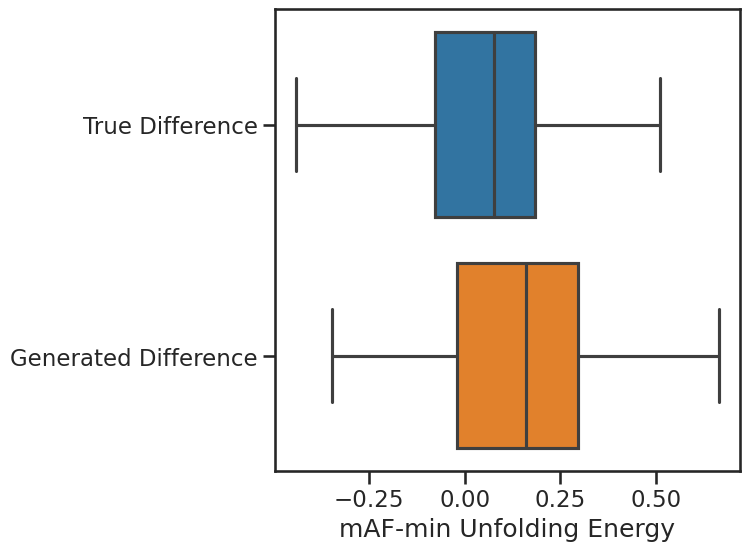

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=kde_data, x='value', y='variable', showfliers=False
        )
ax.set_xlabel('mAF-min Unfolding Energy')
ax.set_ylabel('')
plt.savefig('./figures/estimated_shift_thermo_gen.png', dpi=400, bbox_inches='tight')

In [10]:
stds = [v[1] for v in data.values()]

In [11]:
import scipy.stats

In [18]:
thermo_sigs = 0
for i in range(50):
    p = scipy.stats.ttest_ind_from_stats(
        data[f'meso_{i}'][0],
        data[f'meso_{i}'][1],
        50,
        data[f'thermo_{i}'][0],
        data[f'thermo_{i}'][1],
        50,
        alternative='greater'
    )
    if p[1] < 0.05:
        thermo_sigs += 1

gen_sigs = 0
for i in range(50):
    p = scipy.stats.ttest_ind_from_stats(
        data[f'meso_{i}'][0],
        data[f'meso_{i}'][1],
        50,
        data[f'trans_{i}'][0],
        data[f'trans_{i}'][1],
        50,
        alternative='greater'
    )
    if p[1] < 0.05:
        gen_sigs += 1

In [19]:
thermo_sigs/50

0.56

In [20]:
gen_sigs/50

0.72

## meso vs thermo redundancy

In [1]:
import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
ds = datasets.load_from_disk('../data/dataset/')['train']

In [3]:
ds = ds.remove_columns([c for c in ds.column_names if c not in ['meso_seq', 'thermo_seq']])

In [4]:
ds

Dataset({
    features: ['meso_seq', 'thermo_seq'],
    num_rows: 4013789
})

In [5]:
meso_counts = pd.value_counts(ds['meso_seq'])

In [6]:
thermo_counts = pd.value_counts(ds['thermo_seq'])

In [7]:
meso_counts = pd.DataFrame(meso_counts, columns=['N. replicates']).reset_index(drop=True)

In [8]:
thermo_counts = pd.DataFrame(thermo_counts, columns=['N. replicates']).reset_index(drop=True)

In [9]:
meso_counts['Is'] = 'Mesophilic'
thermo_counts['Is'] = 'Thermophilic'
df = pd.concat([meso_counts, thermo_counts])

In [10]:
df

,N. replicates,Is
0,1775,Mesophilic
1,1327,Mesophilic
2,1120,Mesophilic
3,1038,Mesophilic
4,992,Mesophilic
...,...,...
38733,1,Thermophilic
38734,1,Thermophilic
38735,1,Thermophilic
38736,1,Thermophilic


In [11]:
df['N. replicates'].describe()

count    604253.000000
mean         13.285127
std         145.702381
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max       16613.000000
Name: N. replicates, dtype: float64

In [12]:
df.groupby('Is').describe()

N. replicates                                               \
                     count        mean         std  min  25%  50%   75%   
Is                                                                        
Mesophilic        565515.0    7.097582   16.237713  1.0  1.0  2.0   6.0   
Thermophilic       38738.0  103.613738  564.431511  1.0  2.0  8.0  42.0   

                       
                  max  
Is                     
Mesophilic     1775.0  
Thermophilic  16613.0

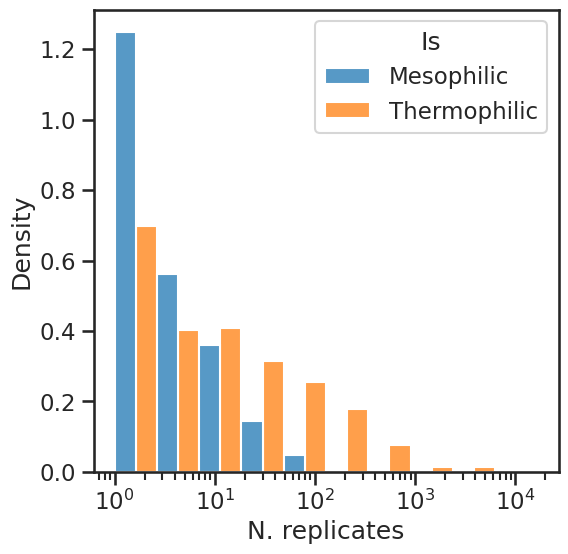

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
sns.histplot(data=df, x='N. replicates', hue='Is', ax=ax, log_scale=True, bins=10, cumulative=False, multiple='dodge', stat='density', common_norm=False)
plt.savefig('./figures/data_redundancy.png', dpi=400, bbox_inches='tight')